In [480]:
#!pip install geopandas
#!pip install matplotlib
#!pip install mapclassify

In [481]:
# Import the libraries needed for project
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')
import mapclassify

In [482]:
# Read in json file into geopandas
gdf=geopandas.read_file('nyc_bb.geojson')
# Read in csv file
dogs = pd.read_csv('dogs_lic.csv')
# Read in second csv file
income = pd.read_csv('borough_income.csv')

In [483]:
# Grouping the dogs together by borough
dogs_grouped = dogs[['boro_name', 'BreedName', 'X']].groupby(['boro_name', 'BreedName']).size().reset_index(name='count')

In [ ]:
# Making a variable to show the 5 most common dogs by boro_name and adds a count fuction to count the total
top_dog = dogs_grouped.groupby('boro_name').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

C:\Users\sean8\AppData\Local\Temp\ipykernel_21100\3920167367.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_dog = dogs_grouped.groupby('boro_name').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


In [ ]:
# Merging two files together on boro_name. Connecting them on an inner join.
boro_dog = gdf.merge(top_dog, on='boro_name', how='inner')

In [ ]:
# Merging two files together on boro_name. Connecting them on an inner join.
df_inner = pd.merge(dogs, income, on='boro_name', how='inner')

In [487]:
# Check for null values 
null_counts = df_inner.isnull().sum() 
print("Null values in each column:") 
print(null_counts)

Null values in each column:
Unnamed: 0                    0
X                             0
RowNumber                     0
AnimalName                  235
AnimalGender                  0
AnimalBirthMonth              0
BreedName                     0
boro_name                     0
ZipCode                       0
CommunityDistrict          3316
CensusTract2010            3316
NTA                        3316
CityCouncilDistrict        3316
CongressionalDistrict      3316
StateSenatorialDistrict    3316
LicenseIssuedDate             0
LicenseExpiredDate            0
Income                        0
dtype: int64


In [488]:
# Remove rows with null values 
df_inner_cleaned = df_inner.dropna() 
print("\nDataFrame after removing rows with null values:") 
print(df_inner_cleaned)


DataFrame after removing rows with null values:
        Unnamed: 0       X  RowNumber AnimalName AnimalGender  \
0                1       1       1753    SHADOW             M   
1                2       2       2415      ROCCO            M   
2                3       3       3328      LUIGI            M   
3                4       4       7537    PETUNIA            F   
4                5       5       8487      ROMEO            M   
...            ...     ...        ...        ...          ...   
121857      121928  121945     122225      ROCKY            M   
121858      121929  121946     122226      ROXY             F   
121859      121930  121947     122227  VALENTINA            F   
121860      121931  121948     122228      VENUS            F   
121861      121932  121949     122229     WILLOW            F   

              AnimalBirthMonth                   BreedName      boro_name  \
0       01/01/2000 12:00:00 AM                      Beagle       Brooklyn   
1       10/01/20

In [489]:
# Removing columns that are not needed to display the story I want told
df_inner.drop(columns = ['Unnamed: 0', 'X', 'ZipCode', 'AnimalName', 'AnimalGender', 'AnimalBirthMonth', 'RowNumber', 'CommunityDistrict', 'CensusTract2010', 'NTA', 'CityCouncilDistrict', 'CongressionalDistrict', 'StateSenatorialDistrict', 'LicenseIssuedDate', 'LicenseExpiredDate'])

,BreedName,boro_name,Income
0,Beagle,Brooklyn,76780
1,Boxer,Brooklyn,76780
2,Maltese,Bronx,47260
3,Pug,Brooklyn,76780
4,Maltese,Bronx,47260
...,...,...,...
121857,Boston Terrier,Manhattan,99530
121858,"Collie, Border",Brooklyn,76780
121859,German Shepherd Crossbreed,Staten Island,91632
121860,Yorkshire Terrier,Bronx,47260


In [490]:
#adding a count column to count how many times each dog breed is used
dogs[['boro_name', 'BreedName', 'X']].groupby(['boro_name', 'BreedName']).count().reset_index().rename(columns={'X':'Count'})

,boro_name,BreedName,Count
0,Bronx,Affenpinscher,2
1,Bronx,Afghan Hound,3
2,Bronx,Airedale Terrier,1
3,Bronx,Akita,18
4,Bronx,Akita Crossbreed,6
...,...,...,...
1216,Staten Island,Whippet,7
1217,Staten Island,Wire Fox Terrier,15
1218,Staten Island,Xoloitzcuintli,1
1219,Staten Island,Yorkshire Terrier,738


In [ ]:
# Using dataframe to only show Brooklyn part of the CSV
source_data = df_inner[df_inner['boro_name'] == 'Brooklyn']

In [ ]:
# Printing the results
print(source_data)

        Unnamed: 0       X  RowNumber AnimalName AnimalGender  \
0                1       1       1753    SHADOW             M   
1                2       2       2415      ROCCO            M   
3                4       4       7537    PETUNIA            F   
5                6       6      10503    BRANDY             M   
8                9       9      12652       RUBY            F   
...            ...     ...        ...        ...          ...   
121839      121910  121927     122207      BRUNO            M   
121840      121911  121928     122208     BRUNO             M   
121847      121918  121935     122215     ZAINA             F   
121851      121922  121939     122219   KRAFCSIK            M   
121858      121929  121946     122226      ROXY             F   

              AnimalBirthMonth                           BreedName boro_name  \
0       01/01/2000 12:00:00 AM                              Beagle  Brooklyn   
1       10/01/2011 12:00:00 AM                             

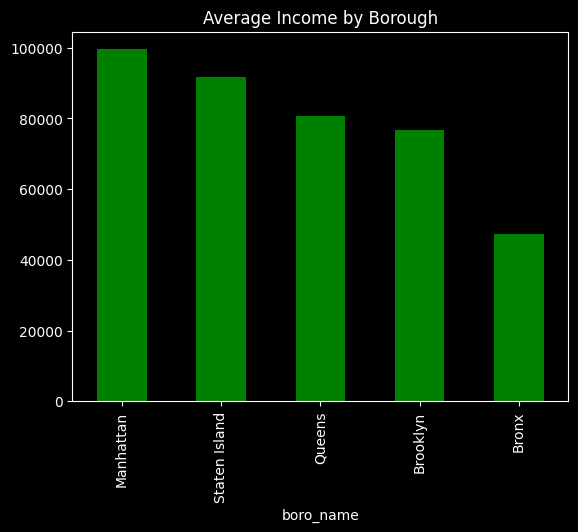

In [498]:
# Group by boro_name and calculate mean income 
income_means = df_inner[['boro_name', 'Income']].groupby('boro_name')['Income'].mean().reset_index() 
# Sort by mean income in descending order 
income_means_sorted = income_means.sort_values(by='Income', ascending=False) 
# Plot the sorted results 
income_means_sorted.plot(kind='bar', x='boro_name', y='Income', color='green', legend=False, title='Average Income by Borough')
 # Show the plot
plt.show()

A bar graph showing the average median income for each borough, ranked from highest to lowest. 

<function matplotlib.pyplot.show(close=None, block=None)>

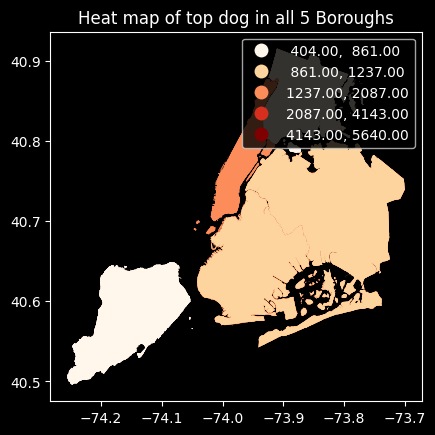

In [499]:
#making a plot of the 5 boroughs with the most popular dog breed, counting the total, changing the color and layout
title = boro_dog.plot('count', legend=True, cmap='OrRd', scheme='natural_breaks')
#adding title to plot
title.set_title('Heat map of top dog in all 5 Boroughs')
#show the plot
plt.show

A geopandas map showing the most owned dog in each borough. It shows a range of each number for each borough.

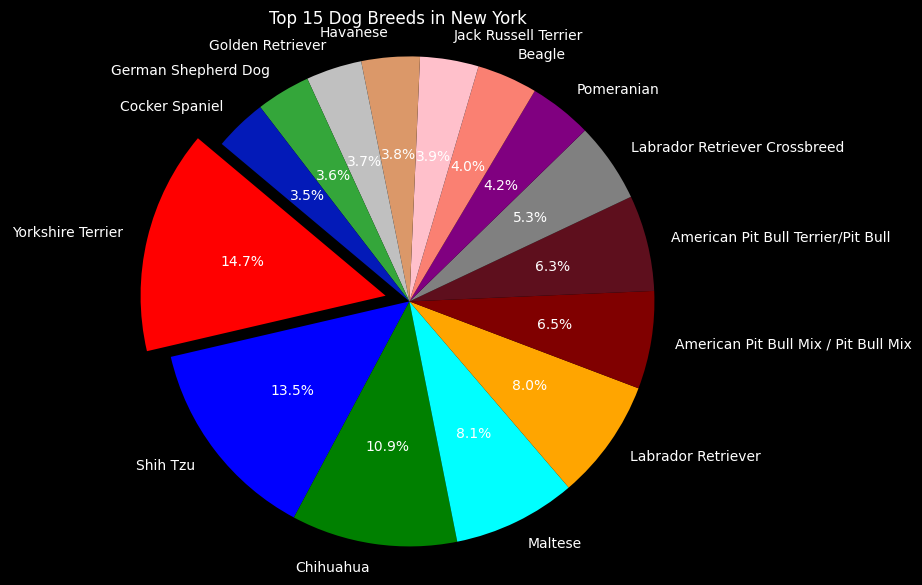

In [500]:
# Count the occurrences of each breed
breed_counts = df_inner['BreedName'].value_counts().reset_index()

# Rename columns for better readability
breed_counts.columns = ['BreedName', 'Count']

# Filter out 'Unknown' breeds
filtered_breed_counts = breed_counts[breed_counts['BreedName'] != 'Unknown']

# Sort the results by count in descending order
sorted_breed_counts = filtered_breed_counts.sort_values(by='Count', ascending=False)

# Display the top 10 results
top_15_breeds = sorted_breed_counts.head(15)

# Determine the index of the slice to explode (the slice with the highest percentage)
explode = [0.1 if i == 0 else 0 for i in range(len(top_15_breeds))]

# Create a pie chart with the top slice exploded
plt.figure(figsize=(10, 7))
plt.pie(top_15_breeds['Count'], labels=top_15_breeds['BreedName'], autopct='%1.1f%%', startangle=140, colors=['red','blue','green','aqua', 'orange', 'maroon', '#5e0f1d', 'gray', 'purple', 'salmon', 'pink', '#db9869', 'silver', '#34a63a', '#031ab8'], explode=explode)
plt.title('Top 15 Dog Breeds in New York')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

A Pie chart showing the top 15 overall dog breeds in the state of New York. Yorkshire Terrier is the most owned dog, so it is exploding away from the pie chart to make the visual easier to see. This is after we filtered out 'Unknown' for the dog breeds. 

<Axes: title={'center': 'Top 5 Dog Breeds in Brooklyn'}, xlabel='BreedName'>

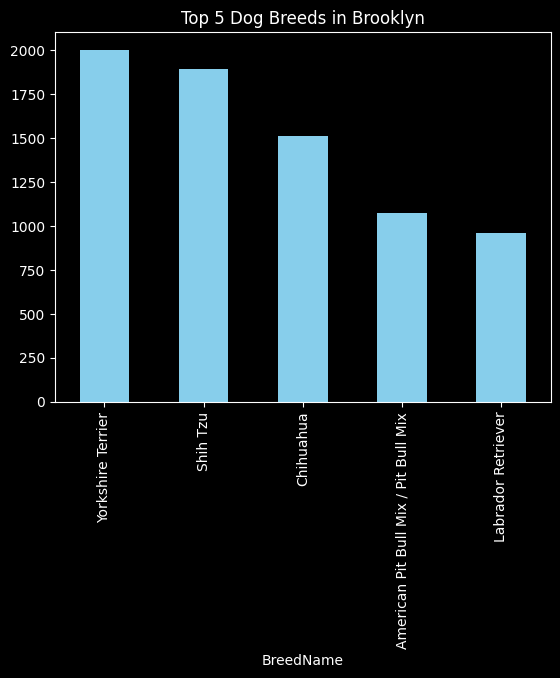

In [501]:
#Filter out just one borough to get the top five dog breeds per borough
brooklyn_df = df_inner[df_inner['boro_name'] == 'Brooklyn'][['boro_name', 'BreedName']] 
# Group by BreedName, count the occurrences, and reset index for further filtering 
brooklyn_breed_counts = brooklyn_df.groupby('BreedName').count().reset_index() 
# Filter out 'Unknown' breeds 
brooklyn_filtered_breed_counts = brooklyn_breed_counts[brooklyn_breed_counts['BreedName'] != 'Unknown'] 
# Sort by boro_name count, get top 5 breeds, and set index for plotting 
brooklyn_top_5_breeds = brooklyn_filtered_breed_counts.sort_values(by='boro_name', ascending=False).head(5).set_index('BreedName') 
# Plot the results 
brooklyn_top_5_breeds.plot(kind='bar', y='boro_name', legend=False, title='Top 5 Dog Breeds in Brooklyn', color='skyblue')

A bar graph that displays the top five dogs owned in the Brooklyn borough, ranked from most owned to least. This is after we filtered out 'Unknown' for the dog breeds.

<Axes: title={'center': 'Top 5 Dog Breeds in Bronx'}, xlabel='BreedName'>

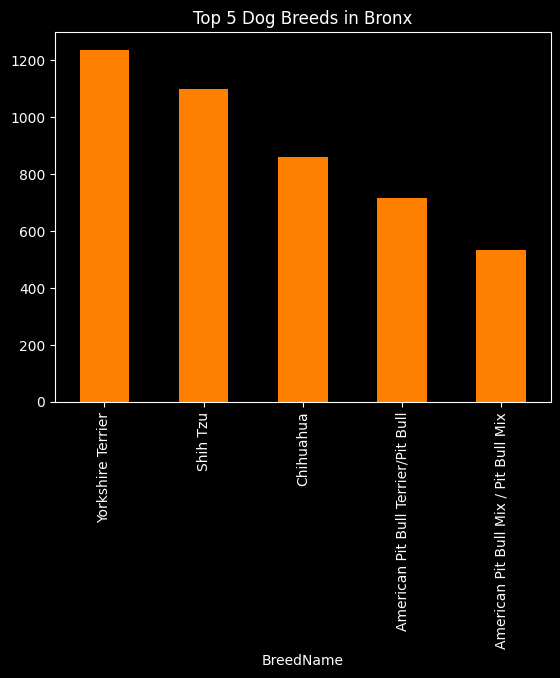

In [502]:
# Filter for Bronx borough 
bronx_df = df_inner[df_inner['boro_name'] == 'Bronx'][['boro_name', 'BreedName']] 
# Group by BreedName, count the occurrences, and reset index for further filtering 
bronx_breed_counts = bronx_df.groupby('BreedName').count().reset_index() 
# Filter out 'Unknown' breeds 
bronx_filtered_breed_counts = bronx_breed_counts[bronx_breed_counts['BreedName'] != 'Unknown'] 
# Sort by boro_name count, get top 5 breeds, and set index for plotting 
bronx_top_5_breeds = bronx_filtered_breed_counts.sort_values(by='boro_name', ascending=False).head(5).set_index('BreedName') 
# Plot the results 
bronx_top_5_breeds.plot(kind='bar', y='boro_name', legend=False, title='Top 5 Dog Breeds in Bronx', color = '#ff7f00')

A bar graph that displays the top five dogs owned in the Bronx borough, ranked from most owned to least. This is after we filtered out 'Unknown' for the dog breeds.

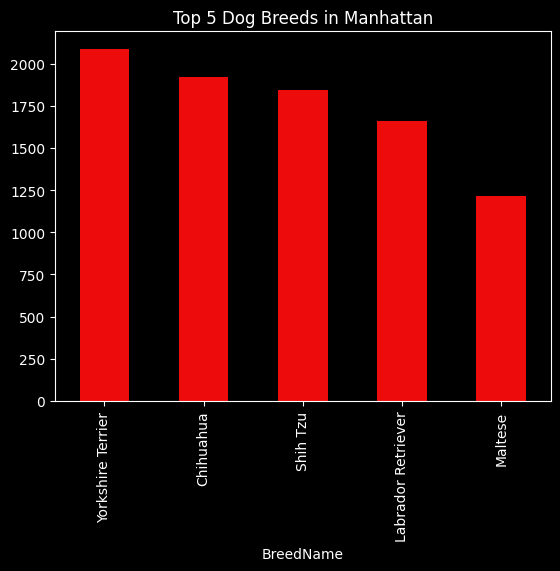

In [503]:
# Filter for Manhattan borough
manhattan_df = df_inner[df_inner['boro_name'] == 'Manhattan'][['boro_name', 'BreedName']]

# Group by BreedName, count the occurrences, and reset index for further filtering
manhattan_breed_counts = manhattan_df.groupby('BreedName').count().reset_index()

# Filter out 'Unknown' breeds
manhattan_filtered_breed_counts = manhattan_breed_counts[manhattan_breed_counts['BreedName'] != 'Unknown']

# Sort by boro_name count, get top 5 breeds, and set index for plotting
manhattan_top_5_breeds = manhattan_filtered_breed_counts.sort_values(by='boro_name', ascending=False).head(5).set_index('BreedName')

# Plot the results
manhattan_top_5_breeds.plot(kind='bar', y='boro_name', legend=False, title='Top 5 Dog Breeds in Manhattan', color='#ee0b0b')

# Show the plot
plt.show()

A bar graph that displays the top five dogs owned in the Manhattan borough, ranked from most owned to least. This is after we filtered out 'Unknown' for the dog breeds.

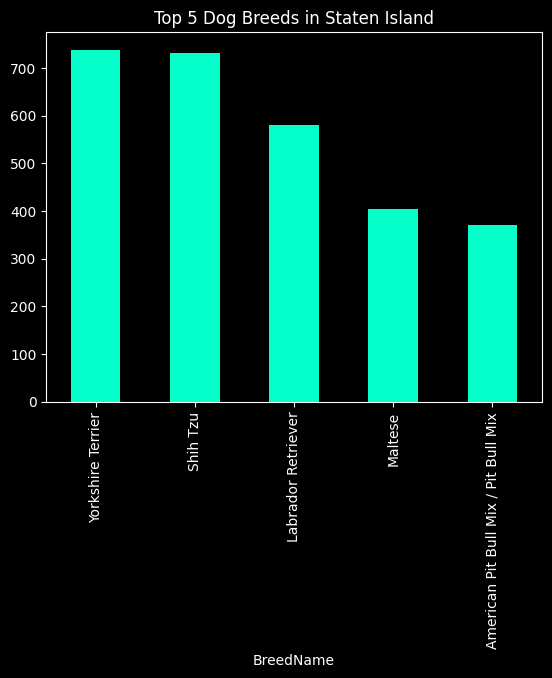

In [504]:
# Filter for Staten Island borough
staten_island_df = df_inner[df_inner['boro_name'] == 'Staten Island'][['boro_name', 'BreedName']]

# Group by BreedName, count the occurrences, and reset index for further filtering
staten_island_breed_counts = staten_island_df.groupby('BreedName').count().reset_index()

# Filter out 'Unknown' breeds
staten_island_filtered_breed_counts = staten_island_breed_counts[staten_island_breed_counts['BreedName'] != 'Unknown']

# Sort by boro_name count, get top 5 breeds, and set index for plotting
staten_island_top_5_breeds = staten_island_filtered_breed_counts.sort_values(by='boro_name', ascending=False).head(5).set_index('BreedName')

# Plot the results
staten_island_top_5_breeds.plot(kind='bar', y='boro_name', legend=False, title='Top 5 Dog Breeds in Staten Island', color='#04ffca')

# Show the plot
plt.show()

A bar graph that displays the top five dogs owned in the Staten Island borough, ranked from most owned to least. This is after we filtered out 'Unknown' for the dog breeds.

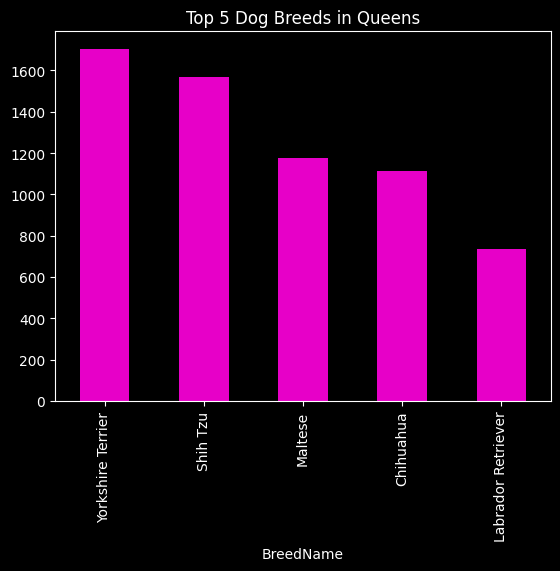

In [505]:
# Filter for Queens borough
queens_df = df_inner[df_inner['boro_name'] == 'Queens'][['boro_name', 'BreedName']]

# Group by BreedName, count the occurrences, and reset index for further filtering
queens_breed_counts = queens_df.groupby('BreedName').count().reset_index()

# Filter out 'Unknown' breeds
queens_filtered_breed_counts = queens_breed_counts[queens_breed_counts['BreedName'] != 'Unknown']

# Sort by boro_name count, get top 5 breeds, and set index for plotting
queens_top_5_breeds = queens_filtered_breed_counts.sort_values(by='boro_name', ascending=False).head(5).set_index('BreedName')

# Plot the results
queens_top_5_breeds.plot(kind='bar', y='boro_name', legend=False, title='Top 5 Dog Breeds in Queens', color='#e700c8')

# Show the plot
plt.show()

And finally, a bar graph showing the top five dogs in the Queens borough, ranked from most to least. This is after we filtered out 'Unknown' for the dog breeds.

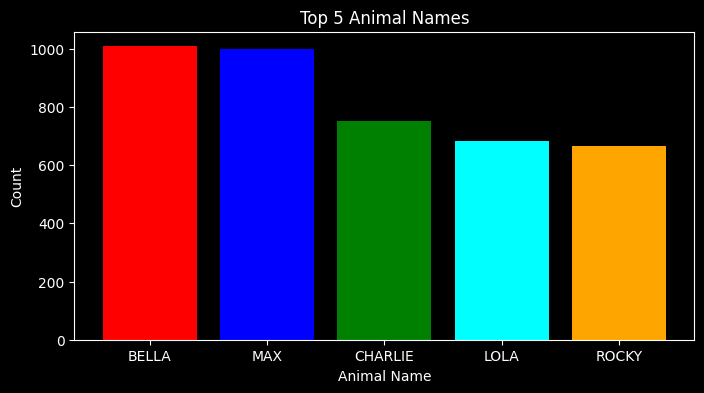

In [506]:
# Here we will look to see the top 5 animal names per New york residents

# Filter out 'Unknown' and 'Name Not Provided'
filtered_df = df_inner[~df_inner['AnimalName'].isin(['UNKNOWN', 'NAME NOT PROVIDED'])]

# Count the occurrences of each animal name
animal_name_counts = filtered_df['AnimalName'].value_counts().reset_index()

# Rename columns for better readability
animal_name_counts.columns = ['AnimalName', 'Count']

# Sort the results by count in descending order
sorted_animal_name_counts = animal_name_counts.sort_values(by='Count', ascending=False)

# Select the top 5 animal names
top_5_animal_names = sorted_animal_name_counts.head(5)

# Create a bar graph
plt.figure(figsize=(8, 4))
plt.bar(top_5_animal_names['AnimalName'], top_5_animal_names['Count'], color=['red', 'blue', 'green', 'aqua', 'orange'])
plt.title('Top 5 Animal Names')
plt.xlabel('Animal Name')
plt.ylabel('Count')
plt.show()


Additionally, we looked at, and ranked, the top five dog names in the state of New York. After we filtered out 'Unknown' and 'Name not provided' fields. Based on the information, Bella is the most common dog name in New York.

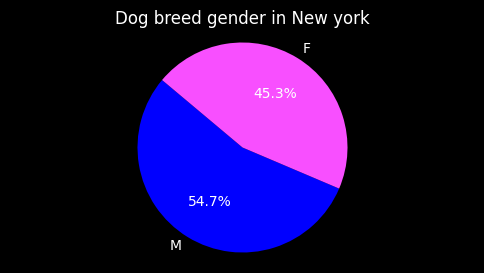

In [526]:
# Remove rows where 'AnimalGender' is null
df_inner_gender_cleaned = df_inner.dropna(subset=['AnimalGender'])

# Filter out 'blank fields' values if needed
df_inner_gender_cleaned = df_inner_gender_cleaned[df_inner_gender_cleaned['AnimalGender'] != ' ']

# Count the occurrences of each gender
gender_counts = df_inner_gender_cleaned['AnimalGender'].value_counts()


# Create a pie chart
plt.figure(figsize=(6, 3))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', '#f84fff'])
plt.title('Dog breed gender in New york')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

Here we do a pie chart showing the gender of dogs owned in New York. Based on the information provided, there are more male dogs in New York than female dogs.